In [1]:
import pandas as pd
from copy import copy
fish_csv=pd.read_csv("fish_landings_2004_2024_tonns.csv")
fish_csv

,Resource,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Sharks,35215,26139,29094,26632,26789,29161,25425,26746,20999,...,23595,23002,19777,21154,16174,10507,13127,12296,16734,23375
1,Skates,3378,3249,3018,2877,3544,3750,1958,2706,2263,...,2004,3627,2628,3740,4281,2963,1826,2532,1658,1353
2,Rays,19990,16940,18566,16485,18266,19916,18186,24017,27802,...,26835,23211,17766,17223,23281,12438,16324,13646,13643,13871
3,Eels,7998,8548,10265,12598,10746,12417,11222,10520,13757,...,11193,11171,13174,11797,12321,9754,15047,17009,15184,16048
4,Catfishes,52137,45422,56540,65049,92401,107593,85670,92678,88524,...,83354,80559,88177,54168,65007,57635,56015,62873,62354,66869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Bivalves,157,215,4583,5975,8893,2771,35,3414,5393,...,5627,1216,52,2782,3945,4175,6917,12979,9473,12017
60,Gastropods,1927,1273,2373,1511,1855,1628,1662,1863,2827,...,2244,2759,2083,2773,4807,496,1360,4521,4892,5018
61,Cephalopods,112754,97069,136041,93976,160714,123667,171580,156824,190408,...,213477,231276,251679,220844,217699,161004,156458,205617,212517,205782
62,Miscellaneous,101996,53029,51781,92632,84000,119273,80917,88105,87624,...,67214,79768,68283,169952,382203,169999,154272,148681,188563,207528


In [2]:
def normalize_year_columns(df, id_col="Resource"):
    df = df.copy()
    df.columns = [
        str(int(float(col))) if col != id_col else col
        for col in df.columns
    ]
    return df


In [3]:
def year_columns(df, id_col="Resource"):
    return sorted(int(col) for col in df.columns if col!=id_col)



In [4]:
def year_totals(df, id_col="Resource"):
    return [int(df[col].iloc[-1])
               for col in df.columns if col !=id_col]


In [10]:

import matplotlib.pyplot as plt


def plot_yearly_trend(years, totals):
    plt.figure(figsize=(14, 6)) # spreading graph horizontally
    plt.plot(years, totals, marker='o')

    plt.xlabel("Year")
    plt.ylabel("Total Fish Landings (tonnes)")
    plt.title("Year-wise Trend of Fish Landings (2004–2024)")

    plt.xticks(years, rotation=45)  # showing every year explicitly
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    

**Fish Landings of 2 decade**

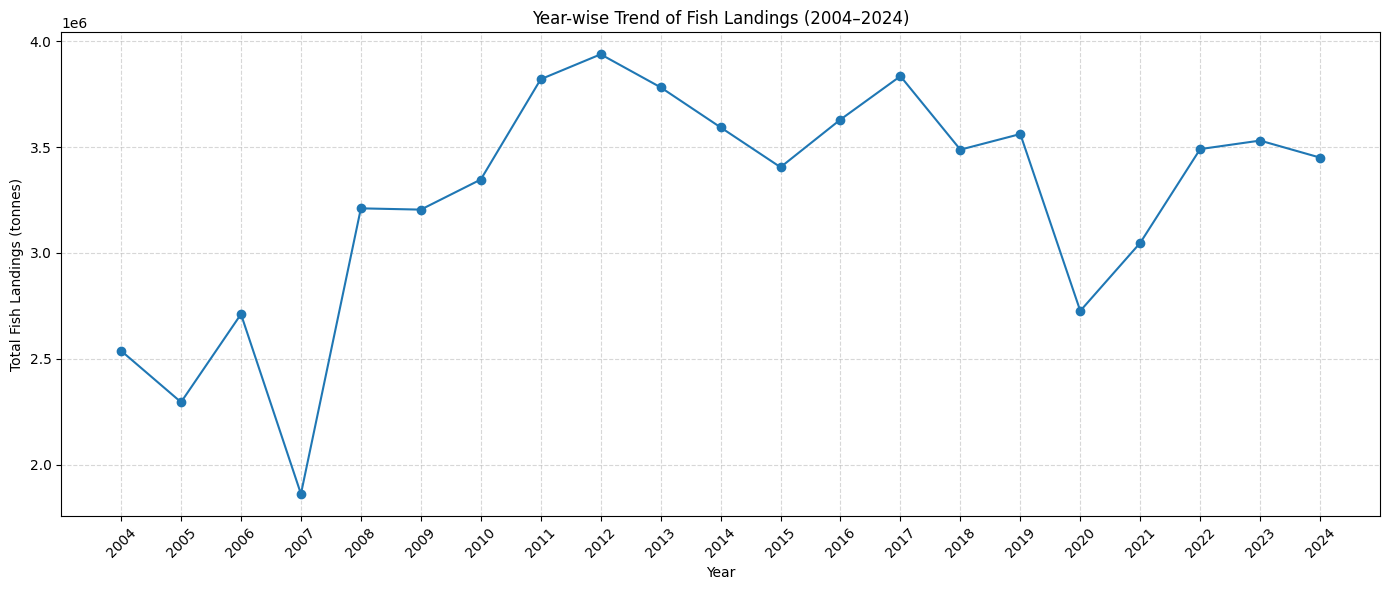

In [11]:
fish_csv = normalize_year_columns(fish_csv)
years = year_columns(fish_csv)
totals = year_totals(fish_csv)
plot_yearly_trend(years=years, totals=totals)

**Growth Model comparison**

In [12]:
import numpy as np

# Linear model
coef_linear = np.polyfit(years, totals, 1)
linear_fit = np.polyval(coef_linear, years)

# Exponential model
log_totals = np.log(totals)
coef_exp = np.polyfit(years, log_totals, 1)
exp_fit = np.exp(np.polyval(coef_exp, years))


In [13]:
def r2_score(y, y_hat):
    ss_res = np.sum((y - y_hat) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - ss_res / ss_tot


In [14]:
r2_linear = r2_score(totals, linear_fit)
r2_exp = r2_score(totals, exp_fit)


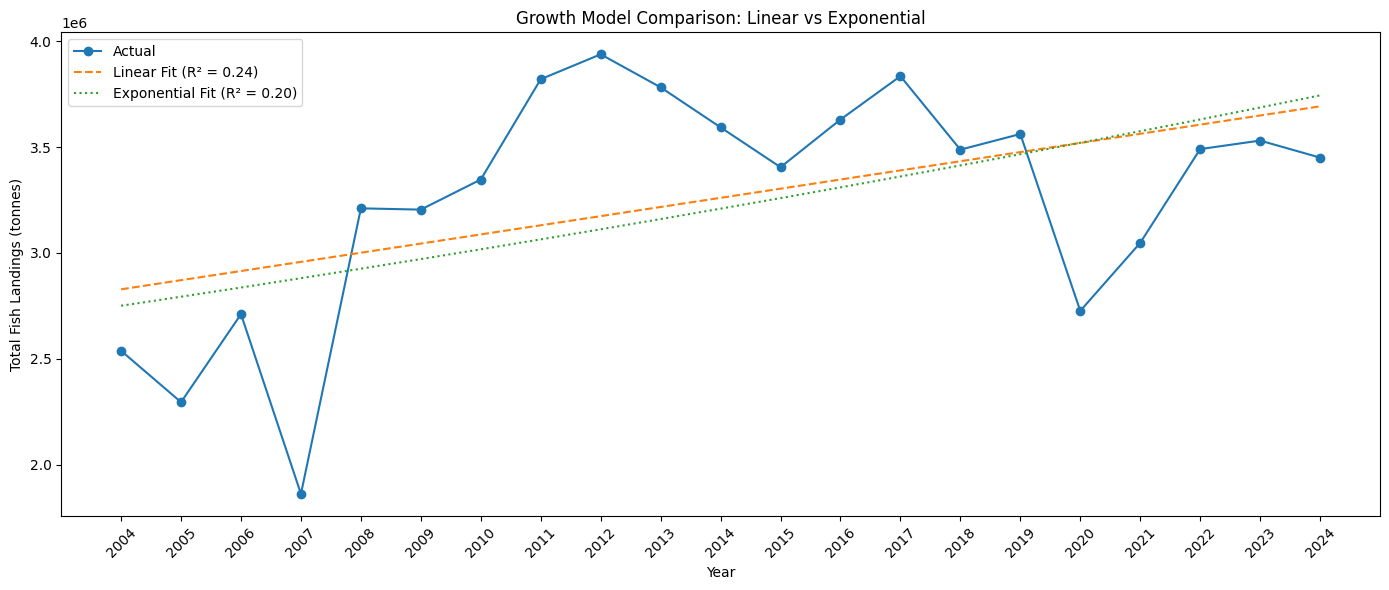

In [15]:
plt.figure(figsize=(14, 6))

plt.plot(years, totals, marker='o', label="Actual")
plt.plot(
    years,
    linear_fit,
    linestyle='--',
    label=f"Linear Fit (R² = {r2_linear:.2f})"
)
plt.plot(
    years,
    exp_fit,
    linestyle=':',
    label=f"Exponential Fit (R² = {r2_exp:.2f})"
)

plt.xlabel("Year")
plt.ylabel("Total Fish Landings (tonnes)")
plt.title("Growth Model Comparison: Linear vs Exponential")
plt.xticks(years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
